# Predicting heart disease using machine learning
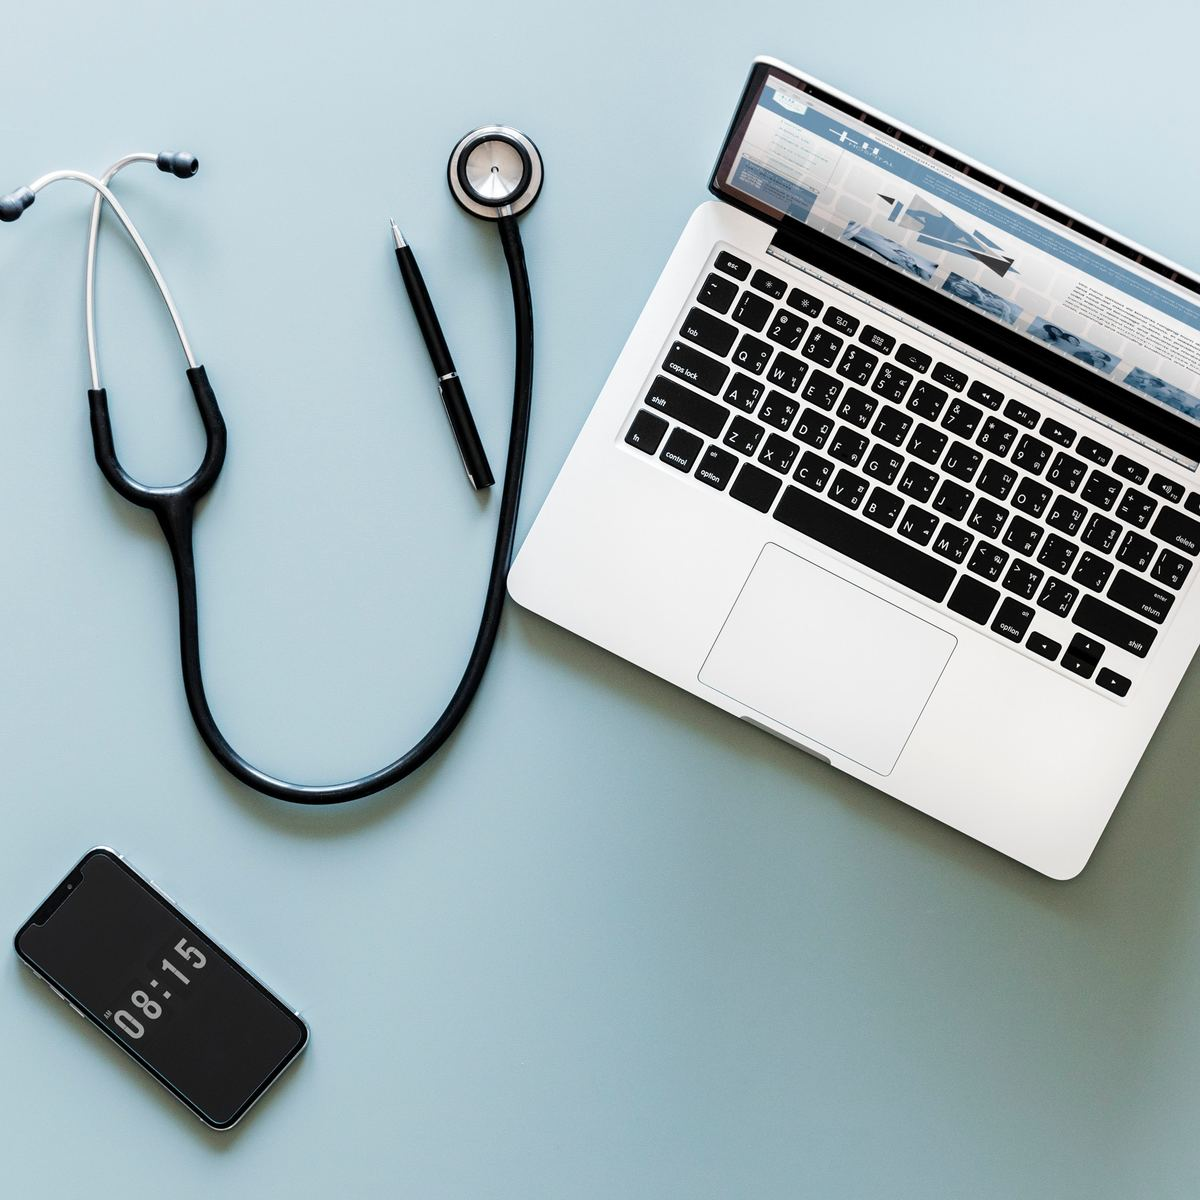
## Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. `age` - age in years
2. `sex` - (1 = male; 0 = female)
3. `cp` - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. `chol` - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. `restecg` - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. `thalach` - maximum heart rate achieved
9. `exang` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. `slope` - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. `ca` - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. `thal` - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Loading the data

In [ ]:
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
df.head()

# 1. Exploratory Data Analysis (EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with. 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

In [ ]:
df.target.value_counts()

In [ ]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

We have `165` person with heart disease and `138` person without heart disease, so our problem is balanced.

In [ ]:
# Checking for messing values
df.isnull().sum()

Looks like the perfect dataset!!! No null values :-)

In [ ]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [ ]:
categorical_val

In [ ]:
plt.figure(figsize=(15, 20))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='black', label='Have Heart Disease = NO',histtype='step',alpha=0.5,linewidth = 3)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES',histtype='step',alpha=0.5,linewidth = 3)
    plt.legend(framealpha=0.3)
    plt.xlabel(column)

- `cp` {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.
- `restecg` {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.
- `exang` {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)
- `slope` {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
- `ca` {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.
- `thal` {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.5)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.5)
    plt.legend()
    plt.xlabel(column)

- `trestbps` : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
- `chol` {serum cholestoral in mg/dl} : above 200 is cause for concern.
- `thalach` {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.
- `oldpeak` ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

### Age vs. Max Heart Rate for Heart Disease

In [ ]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

# 2. Correlation Matrix

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 cbar_kws={"shrink":0.8},
                 fmt=".2f",
                 cmap="cividis",
                yticklabels=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [ ]:
df.corrwith(df.target)
                                             

- `fbs` and `chol` are the lowest correlated with the target variable.
- All other variables have a significant correlation with the target variable.

# 3. Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [ ]:
categorical_val.remove('target')
dataset = pd.get_dummies(df,columns = categorical_val)

In [ ]:
dataset.head()

In [ ]:
print(df.columns)
print(dataset.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [ ]:
dataset.head()

# 4. Applying machine learning algorithms

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Support Vector machine
4. Decision Tree Classifier
5. Random Forest Classifier
6. XGBoost Classifier

## 4. 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

In [ ]:
print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, log_reg.predict(X_test)) * 100
train_score = accuracy_score(y_train, log_reg.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

## 4. 2. K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, knn_classifier.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_classifier.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

## 4. 3. Support Vector machine

In [ ]:
from sklearn.svm import SVC


svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_model.fit(X_train, y_train)

In [ ]:
print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, svm_model.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

## 4. 4. Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(criterion = "entropy",max_depth = 5,random_state=1)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, tree.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

## 4. 5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rand_forest = RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, rand_forest.predict(X_test)) * 100
train_score = accuracy_score(y_train, rand_forest.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

## 4. 6. XGBoost Classifer

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print_score(xgb, X_train, y_train, X_test, y_test, train=True)
print_score(xgb, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, xgb.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

# 5. Applying Machine Learning Algorithms Using Hyperparameter Tuning

## 5. 1. Logistic Regression Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

log_reg = LogisticRegression()

grid_search_cv = GridSearchCV(log_reg, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
#grid_search_cv.fit(X_train, y_train)

In [ ]:
#grid_search_cv.best_estimator_

In [ ]:
log_reg = LogisticRegression(C=0.615848211066026,max_iter=100, 
                             solver='liblinear')

log_reg.fit(X_train, y_train)

print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, log_reg.predict(X_test)) * 100
train_score = accuracy_score(y_train, log_reg.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

## 5. 2. K-nearest neighbors Hyperparameter Tuning

In [ ]:
train_score = []
test_score = []
neighbors = range(1, 21)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

In [ ]:
test_score

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=17)
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, knn_classifier.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_classifier.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

In [ ]:
tuning_results_df=tuning_results_df.drop(index = 1,axis = 0)

## 5. 3. Support Vector Machine Hyperparameter Tuning

In [ ]:
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_grid = GridSearchCV(svm_model, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
# svm_grid.fit(X_train, y_train)

In [ ]:
# svm_grid.best_estimator_

In [ ]:
svm_model = SVC(C=5, gamma=0.01, kernel='rbf')
svm_model.fit(X_train, y_train)

print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, svm_model.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

## 5. 4. Decision Tree Classifier Hyperparameter Tuning

In [ ]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
# grid_search_cv.fit(X_train, y_train)

In [ ]:
# grid_search_cv.best_estimator_

In [ ]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3,
                              min_samples_leaf=2, 
                              min_samples_split=2, 
                              splitter='random')
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, tree.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

## 5. 5. Random Forest Classifier Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


# rf_random.fit(X_train, y_train)

In [ ]:
# rf_random.best_estimator_

In [ ]:
rand_forest = RandomForestClassifier(bootstrap=True,
                                     max_depth=70, 
                                     max_features='auto', 
                                     min_samples_leaf=4, 
                                     min_samples_split=10,
                                     n_estimators=400)
rand_forest.fit(X_train, y_train)

In [ ]:
print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, rand_forest.predict(X_test)) * 100
train_score = accuracy_score(y_train, rand_forest.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

## 5. 6. XGBoost Classifier Hyperparameter Tuning

In [ ]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators': n_estimators, 'max_depth': max_depth,
                       'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
                       'booster' : booster, 'base_score' : base_score
                      }

xgb_model = XGBClassifier()

xgb_cv = RandomizedSearchCV(estimator=xgb_model, param_distributions=hyperparameter_grid,
                               cv=5, n_iter=650, scoring = 'accuracy',n_jobs =-1, iid=True,
                               verbose=1, return_train_score = True, random_state=42)


# xgb_cv.fit(X_train, y_train)

In [ ]:
# xgb_cv.best_estimator_

In [ ]:
xgb_best = XGBClassifier(base_score=0.25, 
                         booster='gbtree',
                         learning_rate=0.05, 
                         max_depth=5,
                         min_child_weight=2, 
                         n_estimators=100)
xgb_best.fit(X_train, y_train)

In [ ]:
print_score(xgb_best, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_best, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, xgb_best.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_best.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

In [ ]:
results_df

It seems that the results doesn't improved a lot after hyperparamter tuning. Maybe because the dataset is small. 

# 6. Features Importance According to Random Forest and XGBoost

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [ ]:
ax = feature_imp(X, rand_forest).plot(kind='barh', figsize=(12,7), legend = False)
ax.set_yticks(list(range(feature_imp(X, rand_forest).shape[0]-1)))
ax.set_yticklabels(feature_imp(X, rand_forest)["feature"].values)




In [ ]:
ax=feature_imp(X, xgb_best).plot(kind='barh', figsize=(12,7), legend=False)
ax.set_yticks(list(range(feature_imp(X, xgb_best).shape[0]-1)))
ax.set_yticklabels(feature_imp(X, xgb_best)["feature"].values)
